In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import random


source_path = '/content/drive/MyDrive/Rice Leaf Disease'

output_path = '/content/drive/MyDrive/Rice_Project_Split'

#Oranlar ödev yönergesindeki gibi
train_ratio = 0.70
val_ratio = 0.10
test_ratio = 0.20


def split_data(source, output, train_r, val_r, test_r):
    if not os.path.exists(source):
        print("HATA: Kaynak klasör bulunamadı! Yolu doğru yazdığından emin ol.")
        return

    if os.path.exists(output):
        print(f"Uyarı: '{output}' klasörü zaten var. Eski veriler silinip tekrar oluşturuluyor...")
        shutil.rmtree(output)
    os.makedirs(output)

    classes = [d for d in os.listdir(source) if os.path.isdir(os.path.join(source, d))]
    print(f"Tespit Edilen Sınıflar: {classes}")

    for class_name in classes:
        # val, train, test klasorleri olusturuluyor
        os.makedirs(os.path.join(output, 'train', class_name), exist_ok=True)
        os.makedirs(os.path.join(output, 'val', class_name), exist_ok=True)
        os.makedirs(os.path.join(output, 'test', class_name), exist_ok=True)

        #Resimler karıstırılıyor
        src_folder = os.path.join(source, class_name)
        images = [f for f in os.listdir(src_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        random.shuffle(images)

        total = len(images)
        train_count = int(total * train_r)
        val_count = int(total * val_r)

        train_imgs = images[:train_count]
        val_imgs = images[train_count:train_count + val_count]
        test_imgs = images[train_count + val_count:]

        for img in train_imgs: shutil.copy(os.path.join(src_folder, img), os.path.join(output, 'train', class_name, img))
        for img in val_imgs:   shutil.copy(os.path.join(src_folder, img), os.path.join(output, 'val', class_name, img))
        for img in test_imgs:  shutil.copy(os.path.join(src_folder, img), os.path.join(output, 'test', class_name, img))

        print(f"-> {class_name} tamamlandı. (Train: {len(train_imgs)}, Val: {len(val_imgs)}, Test: {len(test_imgs)})")

    print("\nİşlem tamamlandı. Veri seti bölündü.")
    print(f"Yeni dosyalar: {output_path}")

split_data(source_path, output_path, train_ratio, val_ratio, test_ratio)

Uyarı: '/content/drive/MyDrive/Rice_Project_Split' klasörü zaten var. Eski veriler silinip tekrar oluşturuluyor...
Tespit Edilen Sınıflar: ['Blast', 'Tungro', 'Brownspot', 'Bacterialblight']
-> Blast tamamlandı. (Train: 1007, Val: 144, Test: 289)
-> Tungro tamamlandı. (Train: 915, Val: 130, Test: 263)
-> Brownspot tamamlandı. (Train: 1120, Val: 160, Test: 320)
-> Bacterialblight tamamlandı. (Train: 1108, Val: 158, Test: 318)

İşlem tamamlandı. Veri seti bölündü.
Yeni dosyalar: /content/drive/MyDrive/Rice_Project_Split


Veriler yükleniyor...
Found 4150 images belonging to 4 classes.
Found 592 images belonging to 4 classes.
Found 1190 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)


Eğitim Başlıyor... Lütfen bekleyin.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 454s 3s/step - accuracy: 0.4567 - loss: 1.3952 - val_accuracy: 0.7973 - val_loss: 0.6070
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 456s 4s/step - accuracy: 0.7664 - loss: 0.6206 - val_accuracy: 0.8514 - val_loss: 0.4181
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 455s 4s/step - accuracy: 0.8504 - loss: 0.4022 - val_accuracy: 0.8716 - val_loss: 0.3817
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.8975 - loss: 0.2878 - val_accuracy: 0.9291 - val_loss: 0.2295
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 452s 3s/step - accuracy: 0.9255 - loss: 0.1993 - val_accuracy: 0.9358 - val_loss: 0.1945
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 454s 3s/step - accuracy: 0.9490 - loss: 0.1398 - val_accuracy: 0.9527 - val_loss: 0.1955
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 455s 4s/step - accuracy: 0.9564 - loss: 0.1239 - val_accuracy: 0.9747 - val_loss: 0.1149
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.9836 - loss: 0.0634 - val_accu

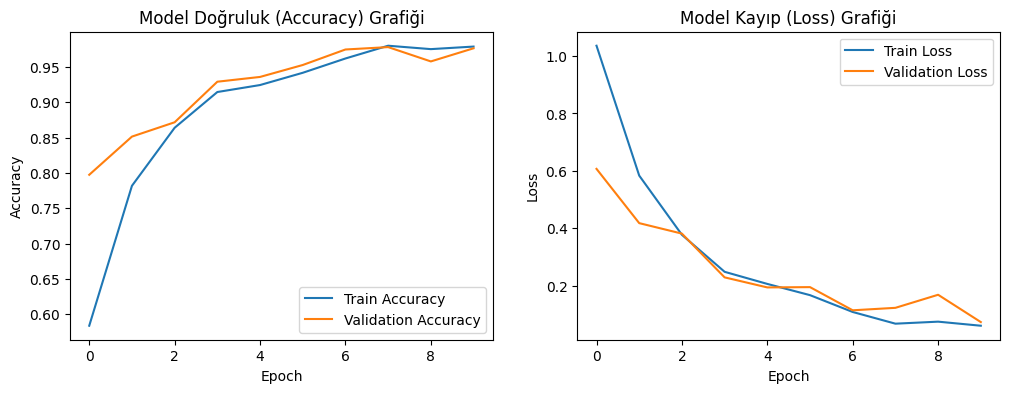

In [ ]:
#Kendi cnn modelimizi tasarlama işlemi
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

#datasetimiz
dataset_path = '/content/drive/MyDrive/Rice_Project_Split'

#görüntü boyutları
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32
EPOCHS = 10  #epoch sayısı

# resimlerin piksellerini rescale ederek 0 1 arasına sıkıstırıyoruz (normalizasyon)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("Veriler yükleniyor.")

train_generator = train_datagen.flow_from_directory(
    directory=f'{dataset_path}/train',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    directory=f'{dataset_path}/val',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    directory=f'{dataset_path}/test',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# cnn model tasarımı
model = Sequential([

    #konvolüsyon blokları
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),


    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# modeli compile edelim
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#eğitim kısmı
print("\nEğitim Başlıyor.")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

print("\nEğitim Tamamlandı.")

#grafik çizimleri, doğruluk ve kayıp(accuracy, loss)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Doğruluk (Accuracy) Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Kayıp (Loss) Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#hiperparametre optimizasyonu
import os
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#ayarlar
dataset_path = '/content/drive/MyDrive/Rice_Project_Split'
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32

#klasor kontrolu
if not os.path.exists(dataset_path):
    print(f"HATA: '{dataset_path}' klasörü bulunamadı. Lütfen yolun doğruluğunu kontrol et.")
else:
    print(f"Klasör bulundu: {dataset_path}")

    #verileri yükleme
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen = ImageDataGenerator(rescale=1./255)

    print("Veriler yükleniyor...")

    train_generator = train_datagen.flow_from_directory(
        directory=f'{dataset_path}/train',
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    )

    validation_generator = val_datagen.flow_from_directory(
        directory=f'{dataset_path}/val',
        target_size=(IMG_WIDTH, IMG_HEIGHT),
        batch_size=BATCH_SIZE,
        class_mode='categorical'
    )

    
    def build_model(hp):
        model = Sequential()

        # Conv Bloğu 1
        model.add(Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=64, step=32),
            kernel_size=(3,3),
            activation='relu',
            input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
        ))
        model.add(MaxPooling2D(2,2))

        # Conv Bloğu 2
        model.add(Conv2D(
            filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=32),
            kernel_size=(3,3),
            activation='relu'
        ))
        model.add(MaxPooling2D(2,2))

        model.add(Flatten())

        # Dense Katmanı
        model.add(Dense(
            units=hp.Int('dense_units', min_value=64, max_value=128, step=64),
            activation='relu'
        ))

        model.add(Dropout(hp.Float('dropout', 0.3, 0.5, step=0.1)))

        model.add(Dense(4, activation='softmax'))

        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])

        model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        return model

    #tuner ayarları
    tuner = kt.RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=3,
        executions_per_trial=1,
        directory='my_dir',
        project_name='rice_tuning_v3'
    )

    print("\nHiperparametre Araması Başlıyor...")
    tuner.search(train_generator, epochs=3, validation_data=validation_generator)

    #en iyi sonuclar alınacak
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("EN İYİ AYARLAR")
    print(f"En iyi Filtre Sayısı (Conv 1): {best_hps.get('conv_1_filter')}")
    print(f"En iyi Dense Nöron Sayısı: {best_hps.get('dense_units')}")
    print(f"En iyi Learning Rate: {best_hps.get('learning_rate')}")



Trial 3 Complete [00h 19m 56s]
val_accuracy: 0.5895270109176636

Best val_accuracy So Far: 0.9037162065505981
Total elapsed time: 01h 09m 51s

--- EN İYİ AYARLAR BULUNDU ---
En iyi Filtre Sayısı (Conv 1): 64
En iyi Dense Nöron Sayısı: 64
En iyi Learning Rate: 0.001


Mounted at /content/drive

Veriler hazırlanıyor...
Found 4150 images belonging to 4 classes.
Found 592 images belonging to 4 classes.
Found 1190 images belonging to 4 classes.

Final Model Kuruluyor... (Filtre: 64, Dense: 64, LR: 0.001)
Final Eğitim Başlıyor... (Bu işlem biraz sürebilir)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 1023s 8s/step - accuracy: 0.4564 - loss: 1.2509 - val_accuracy: 0.6622 - val_loss: 0.8479
Epoch 2/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 345s 3s/step - accuracy: 0.7016 - loss: 0.7715 - val_accuracy: 0.7466 - val_loss: 0.5960
Epoch 3/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 349s 3s/step - accuracy: 0.7935 - loss: 0.5565 - val_accuracy: 0.8801 - val_loss: 0.3571
Epoch 4/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.8745 - loss: 0.3527 - val_accuracy: 0.8699 - val_loss: 0.3739
Epoch 5/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 351s 3s/step - accuracy: 0.8993 - loss: 0.2653 - val_accuracy: 0.9561 - val_loss: 0.1540
Epoch 6/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.9339 - loss: 0.1762 - val_accuracy: 0.9611 - val_loss: 0.1317
Epoch 7/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.9472 - loss: 0.1450 - val_accuracy: 0.9645 - val_loss: 0.1282
Epoch 8/15
130/130 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.9622 - loss: 0.1097 - val_acc

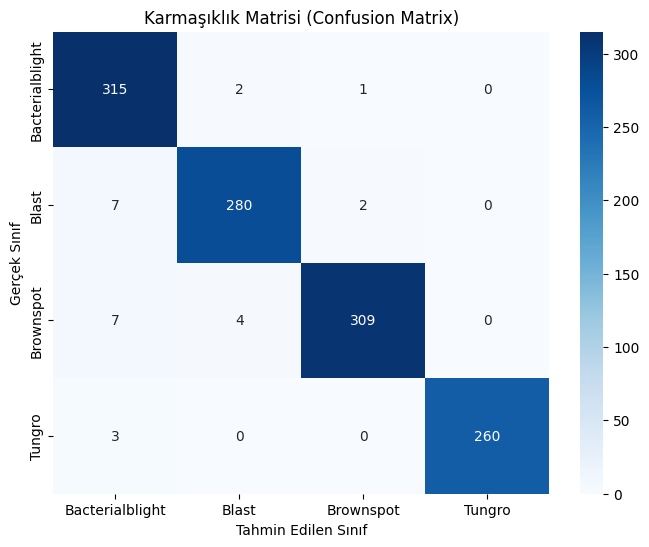

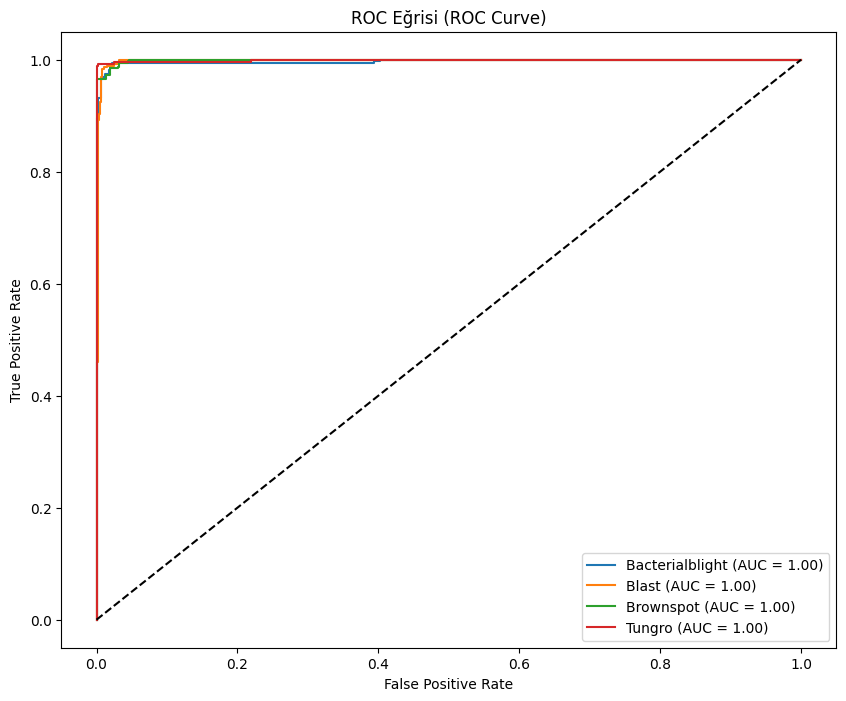

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

dataset_path = '/content/drive/MyDrive/Rice_Project_Split'
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32

# Veri Yükleyicileri (Generator) Tekrar Kuruyoruz
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

print("\nVeriler hazırlanıyor.")

train_generator = train_datagen.flow_from_directory(
    directory=f'{dataset_path}/train',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    directory=f'{dataset_path}/val',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    directory=f'{dataset_path}/test',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

#en iyi ayarlarla final modeli kurulumu
BEST_FILTERS = 64
BEST_DENSE = 64
BEST_LR = 0.001

print(f"\nFinal Model Kuruluyor... (Filtre: {BEST_FILTERS}, Dense: {BEST_DENSE}, LR: {BEST_LR})")

model = Sequential([
    # Conv 1
    Conv2D(BEST_FILTERS, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(2, 2),

    # Conv 2
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Conv 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    # Dense
    Dense(BEST_DENSE, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=BEST_LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# egitim
print("Final Eğitim Başlıyor...")
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)

print("\nTest Verisi Üzerinde Değerlendirme Yapılıyor.")

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

acc = accuracy_score(y_true, y_pred)
balanced_acc = balanced_accuracy_score(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print(f"\n1. AŞAMA SONUÇ RAPORU")
print(f"Test Accuracy (Doğruluk): {acc:.4f}")
print(f"Balanced Accuracy       : {balanced_acc:.4f}")
print(f"MCC (Matthews Coeff)    : {mcc:.4f}")
print(f"Precision (Kesinlik)    : {precision:.4f}")
print(f"Recall (Duyarlılık)     : {recall:.4f}")
print(f"F1 Score                : {f1:.4f}")
print("-" * 30)

#rapor
print(classification_report(y_true, y_pred, target_names=class_labels))

#confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Karmaşıklık Matrisi (Confusion Matrix)')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.show()

#ROC egrisi
lb = LabelBinarizer()
lb.fit(y_true)
y_true_bin = lb.transform(y_true)

plt.figure(figsize=(10, 8))
for i, label in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (ROC Curve)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, matthews_corrcoef, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def train_and_evaluate(model_name, base_model_func, train_gen, val_gen, test_gen):
    print(f"\n{'='*40}")
    print(f"MODEL EĞİTİLİYOR: {model_name}")
    print(f"{'='*40}")

    base_model = base_model_func(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(4, activation='softmax')(x) # 4 Sınıf

    model = Model(inputs=base_model.input, outputs=predictions)

    #derleme
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    #egitim
    history = model.fit(train_gen, epochs=10, validation_data=val_gen, verbose=1)

    # test ve rapor
    print(f"\n--- {model_name} Test Sonuçları ---")
    preds = model.predict(test_gen)
    y_pred = np.argmax(preds, axis=1)
    y_true = test_gen.classes
    labels = list(test_gen.class_indices.keys())

    #metrikler
    acc = accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    print(f"Accuracy : {acc:.4f}")
    print(f"MCC      : {mcc:.4f}")
    print(f"F1 Score : {f1:.4f}")

    #sonuclar
    return {
        'Model': model_name,
        'Accuracy': acc,
        'MCC': mcc,
        'F1 Score': f1,
        'History': history,
        'y_true': y_true,
        'y_pred': y_pred,
        'preds_proba': preds
    }

results = []

#vgg16
res_vgg = train_and_evaluate("VGG16", VGG16, train_generator, validation_generator, test_generator)
results.append(res_vgg)

#resnet50
res_resnet = train_and_evaluate("ResNet50", ResNet50, train_generator, validation_generator, test_generator)
results.append(res_resnet)

#inceptionv3
res_inception = train_and_evaluate("InceptionV3", InceptionV3, train_generator, validation_generator, test_generator)
results.append(res_inception)

#mobilenetv2
res_mobile = train_and_evaluate("MobileNetV2", MobileNetV2, train_generator, validation_generator, test_generator)
results.append(res_mobile)

#kıyaslama tablosu
print("\n" + "="*40)
print("TRANSFER LEARNING KARŞILAŞTIRMA TABLOSU")
print("="*40)
df_results = pd.DataFrame(results)[['Model', 'Accuracy', 'MCC', 'F1 Score']]
print(df_results)


MODEL EĞİTİLİYOR: VGG16
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1846s 14s/step - accuracy: 0.5370 - loss: 1.1128 - val_accuracy: 0.7922 - val_loss: 0.6006
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1928s 15s/step - accuracy: 0.7704 - loss: 0.5844 - val_accuracy: 0.8226 - val_loss: 0.4427
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1945s 15s/step - accuracy: 0.8260 - loss: 0.4521 - val_accuracy: 0.8530 - val_loss: 0.3610
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1880s 14s/step - accuracy: 0.8694 - loss: 0.3598 - val_accuracy: 0.8834 - val_loss: 0.3089
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1892s 15s/step - accuracy: 0.8786 - loss: 0.3092 - val_accuracy: 0.9020 - val_loss: 0.2715
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1861s 14s/step - accuracy: 0.8972 - loss: 0.2738 - val_accuracy: 0.8818 - val_loss: 0.2908
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 1876s 14s/step - accuracy: 0.9085 - loss: 0.2521 - val_accuracy: 0.9206 - val_loss: 0.2114
Epoch 8

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

dataset_path = '/content/drive/MyDrive/Rice_Project_Split'
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=f'{dataset_path}/train',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    directory=f'{dataset_path}/val',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

#mobilenetv2 kurulumu
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#epoch'lar basliyor
print("Eğitim Başlıyor...")
history = model.fit(train_generator, epochs=5, validation_data=validation_generator, verbose=1)

print("\nModel Kaydediliyor...")
model.save('rice_disease_mobilenet_final.h5')
print("İşlem tamamlandı.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- SADECE MOBILENETV2 EĞİTİLİYOR (HIZLI MOD) ---
Found 4150 images belonging to 4 classes.
Found 592 images belonging to 4 classes.
Eğitim Başlıyor...
Epoch 1/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.7345 - loss: 0.6827 - val_accuracy: 0.9476 - val_loss: 0.1464
Epoch 2/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.9469 - loss: 0.1435 - val_accuracy: 0.9730 - val_loss: 0.0831
Epoch 3/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9826 - loss: 0.0654 - val_accuracy: 0.9831 - val_loss: 0.0541
Epoch 4/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9846 - loss: 0.0526 - val_accuracy: 0.9916 - val_loss: 0.0325
Epoch 5/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9956 - loss: 0.0245 - val_accuracy: 0.9949 - val_loss: 0.0282



Model Kaydediliyor...
✅ İŞLEM TAMAM! 'rice_disease_mobilenet_final.h5' dosyasını indirip çıkabilirsin.
